<a href="https://colab.research.google.com/github/wajeehafarooqi/Transfer-Learning/blob/main/transferLearning_facerecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
for(i,layer) in enumerate(vgg.layers):
    print(str(i) + " " + layer.__class__.__name__,layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
train_path = 'D:\wajeeha\TRANSFER_LEARNING\project1\train'
valid_path = 'D:\wajeeha\TRANSFER_LEARNING\project1\test'

In [ ]:
 # useful for getting number of classes
folders = glob('D://wajeeha/TRANSFER_LEARNING/project1/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='sigmoid')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode='nearest',
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('D://wajeeha/TRANSFER_LEARNING/project1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 15,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('D://wajeeha/TRANSFER_LEARNING/project1/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical',
                                            shuffle=False)

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

Found 20 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),validation_steps=len(test_set)
)

C:\Users\wajee\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
2/2 [==============================] - 3s 326ms/step - loss: 1.9090 - accuracy: 0.1222
Epoch 2/5
2/2 [==============================] - 2s 329ms/step - loss: 1.1016 - accuracy: 0.7222
Epoch 3/5
2/2 [==============================] - 3s 2s/step - loss: 0.4764 - accuracy: 0.7333
Epoch 4/5
2/2 [==============================] - 2s 328ms/step - loss: 0.1769 - accuracy: 1.0000
Epoch 5/5
2/2 [==============================] - 2s 329ms/step - loss: 0.2754 - accuracy: 0.8333


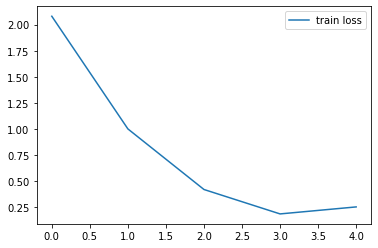

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
#plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

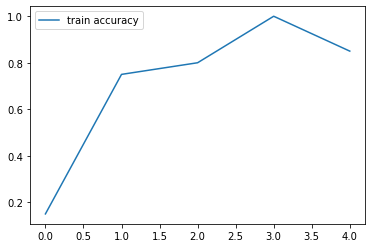

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
#plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('D://wajeeha/TRANSFER_LEARNING/project1/facefeatures_new_model.h5')

In [ ]:
from keras.models import load_model
classifier = load_model('D://wajeeha/TRANSFER_LEARNING/project1/facefeatures_new_model.h5')

In [ ]:
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

In [ ]:
!pip install opencv-python

In [ ]:
# Loading the cascades
face_cascade = cv2.CascadeClassifier('D://wajeeha/TRANSFER_LEARNING/project1/haarcascade_frontalface_default.xml')

In [ ]:
def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

In [ ]:
from PIL import Image
# Doing some Face Recognition with the webcam provide 0
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()
    #canvas = detect(gray, frame)
    #image, face =face_detector(frame)
    
    face=face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (224, 224))
        im = Image.fromarray(face, 'RGB')
           #Resizing into 128x128 because we trained the model with this image size.
        img_array = np.array(im)
                    #Our keras model used a 4D tensor, (images x height x width x channel)
                    #So changing dimension 128x128x3 into 1x128x128x3 
        img_array = np.expand_dims(img_array, axis=0)
        pred = classifier.predict(img_array)
        print(pred)
                     
        name="None matching"
        
        if(pred[0][2]>0.5):
            name='wajeeha'
        cv2.putText(frame,name, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    else:
        cv2.putText(frame,"Aaira", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()